# Nauyaca Documentation

## Instalation 

In [1]:
!which python

/home/eliab/anaconda2/envs/Py37/bin/python


## Quickstart

First import the necessary modules. All these are in the nauyaca package

In [3]:

from setplanet import SetPlanet
from utils import *
from operatettvs import Optimizers, MCMC
from planetarysystem import PlanetarySystem



In [4]:
# Aditional packages
import numpy as np
#from IPython.display import Latex
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### The planet object

Before initialize a TTV simulation, let's define a planet object just by giving the planet name

In [5]:
Planet1 = SetPlanet("Planet-b")

For each planet, a parameter space must be stablished. That is done through the .set_boundaries attribute. 

It must be given a range [minimum, maximum] for the seven planetary parameter, namely:

In [4]:
# Physical boundaries where the solutions to the TTVs will be looked for
Planet1.set_boundaries(
    mass=[.1, 50],                # Planet mass [Mearth]
    period=[33.5, 33.7],          # Orbital period [days]
    ecc=[0., 0.5],                # eccentricity 
    inclination=[80, 90.],        # Orbital inclination [deg]
    argument=[0., 360.],          # Argument of periastron (omega) [deg]
    mean_anomaly=[0, 360.],       # Meananomaly (M) [deg]
    ascending_node=[170, 180.])   # Ascending node [deg]

To keep a planetary parameter constant just set the minimum and maximum equal. For example: inclination=[90.0, 90.0]. That means that inclination of first planet will not be sampled in the optimizers or mcmc

##### Important: 
##### The 7 Planetary parameters that the tool explores are: mass, period, eccentricity, inclination, argument, mean anomaly and ascending node

##### Units inside the package are:
Stellar mass -- Msun

Stellar radius -- Rsun

Planet mass -- Earth masses

Planet period -- days

Inclination -- deg

Argument -- deg

Mean anomaly -- deg

Ascending node -- deg

Now, we give the TTVs observations to the planet throught the .add_ttvs attribute. The TTV data should be a python dictionary containing transit number as key (starting from  0) and a list of the form [tc, tc_e, tc_E] as value, where tc is the observed central transit time, tc_e and tc_E are the lower and upper uncertainties, respectively.

For example, a file containing these data looks like:

In [5]:
! head -8  ./sintetico/planetb_ttvs.dat

#Transit  t_c      1sigma_lower 1sigma_upper
#Number     (days)     (days)         (days)     
0	21.5523131438	0.000629	0.000384 
1	55.1728893405	0.000758	0.000739 
2	88.7952811376	0.000562	0.0004 	
3	122.418924701	0.000559	0.000774 
4	156.041707622	0.000619	0.000623 
5	189.669905447	0.000975	0.000898 


To add these observed TTVs, just convert the observations to a dictionary

In [6]:
# Convert data to dictionary
ttvs1 = {}
f = np.genfromtxt("./sintetico/planetb_ttvs.dat")
for i in f:
    ttvs1[int(i[0])] = [i[1], i[2], i[3] ]

# Pass TTVs as an dictionary
Planet1.add_ttvs(ttvs1)

Now let's create another planet object and do the same as before

In [7]:
# Planeta 2

Planet2 = SetPlanet("Planet-c")

Planet2.set_boundaries( 
    mass=[.1, 50], 
    period=[73.4, 73.6],
    ecc=[0, .5],  
    inclination=[80,90.],
    argument=[0.1, 360.], 
    mean_anomaly=[0., 360.], 
    ascending_node=[180., 180.] )#[175.07, 175.07])

ttvs2 = {}
f = np.genfromtxt("./sintetico/planetc_ttvs.dat")
for i in f:
    ttvs2[int(i[0])] = [i[1], i[2], i[3] ]

Planet2.add_ttvs(ttvs2)

At this point, we have created two Planet objects, each with a name, boundaries and TTVs. For example:

In [8]:
print("Planet name: ",Planet1.planet_id)
print("-------------")
print("Planet bounds: ",Planet1.boundaries)
print("-------------")
print("Planet TTVs:", Planet1.ttvs_data)

Planet name:  Planet-b
-------------
Planet bounds:  [[0.1, 50], [33.5, 33.7], [0.0001, 0.5], [80, 90.0], [0.0, 360.0], [0.0, 360.0], [170, 180.0]]
-------------
Planet TTVs: {0: [21.5523131438, 0.000629, 0.000384], 1: [55.1728893405, 0.000758, 0.000739], 2: [88.7952811376, 0.000562, 0.0004], 3: [122.418924701, 0.000559, 0.000774], 4: [156.041707622, 0.000619, 0.000623], 5: [189.669905447, 0.000975, 0.000898], 6: [223.293933475, 0.00079, 0.000654], 7: [256.923266313, 0.000856, 0.00084], 8: [290.550182491, 0.000319, 0.000548], 9: [324.168450812, 0.000524, 0.000849], 10: [357.788534159, 0.000374, 0.000499], 11: [391.407056892, 0.000406, 0.000627], 12: [425.027105064, 0.000602, 0.000454], 13: [458.649125492, 0.000805, 0.000671], 14: [492.272085472, 0.000815, 0.000871], 15: [525.895441419, 0.000733, 0.00058], 16: [559.522024235, 0.000834, 0.000946], 17: [593.145545227, 0.000628, 0.000589], 18: [626.777478433, 0.000703, 0.000679], 19: [660.405076718, 0.000474, 0.000478], 20: [694.025509307,

Now let's put them together in a Planetary system.

### The Planetary System object

Once we have set the planets, we can construct a Planetary system simply defining:

In [9]:
# Create a Planetary System
PS = PlanetarySystem( "SystemX", 0.91, 1.18, Ftime="Default")

where first argument is the planetary system name, second and third arguments are mass and stellar radius (in Msun and Rsun units), and the last parameter Ftime is the maximum observed time to run the simulations. 

Note: For Ftime, 'default' means that the TTVs simulation will run to span the entire time of TTVs observations. However you can specify another lower value.
For example, if your TTVs span 1000 [BJD] of observations and you set Ftime=500, then all the central transit times greater than 500 (for all the planets) will be discarted and the fitting will be performed until 500 days.

Now, let's add the created planets into the Planetary System object just passing a list of the planet objects

In [10]:
# Adding planets. Add planets in a list. The order is important
PS.add_planets([Planet1, Planet2])

--> Pickle file SystemX.pkl has been saved


When the Planetary System is created, a .pkl file is saved. This is a python pickle file that contains the Planetary System object and all the necessary to restart TTVs simulations. This file will be useful soonly.

Let's print a summary of our Planetary system

In [11]:
print(PS)


 =========== Planetary System Summary =========== 
System: SystemX
Mstar: 0.91 Msun |  Rstar: 1.18 Rsun
Number of planets: 2
------
Planet-b
     mass      period      ecc      inclination      argument      mean_anomaly      ascending_node
  [0.1, 50]  [33.5, 33.7]  [0.0001, 0.5]  [80, 90.0]  [0.0, 360.0]  [0.0, 360.0]  [170, 180.0]
  TTVs: True
------
Planet-c
     mass      period      ecc      inclination      argument      mean_anomaly      ascending_node
  [0.1, 50]  [73.4, 73.6]  [0.0001, 0.5]  [80, 90.0]  [0.1, 360.0]  [0.0, 360.0]  [180.0, 180.0]
  TTVs: True

Total time of TTVs data: 996.625070414 [days]
First planet (ID) in transit: Planet-b
Observed time of the first transit: 21.5523131438 [days]
Interval time to make the simulations: 977.22798858458


As before, you access to data of the planetary system

In [12]:
# Bounds are in the same order as you added the planets
# FOR EACH PLANET, the order of the parameter space is:
# 0.-mass, 1.-period, 2.-eccentricity, 3.-inclination, 
# 4.-argument, 5.-mean anomaly, 6.-ascending node
print("Bounds: ", PS.bounds) 
print("-------------")

# For clarity, params_names could helps to identify the whole parameter space
print("Boundaries:")
for i, names in enumerate(PS.params_names.split()):
    print("  %s : %s" % ( names, PS.bounds[i]))


Bounds:  [[0.1, 50], [33.5, 33.7], [0.0001, 0.5], [80, 90.0], [0.0, 360.0], [0.0, 360.0], [170, 180.0], [0.1, 50], [73.4, 73.6], [0.0001, 0.5], [80, 90.0], [0.1, 360.0], [0.0, 360.0]]
-------------
Boundaries:
  mass1 : [0.1, 50]
  period1 : [33.5, 33.7]
  ecc1 : [0.0001, 0.5]
  inclination1 : [80, 90.0]
  argument1 : [0.0, 360.0]
  mean_anomaly1 : [0.0, 360.0]
  ascending_node1 : [170, 180.0]
  mass2 : [0.1, 50]
  period2 : [73.4, 73.6]
  ecc2 : [0.0001, 0.5]
  inclination2 : [80, 90.0]
  argument2 : [0.1, 360.0]
  mean_anomaly2 : [0.0, 360.0]


In [13]:
# If there is a planet with constant values in its parameter space,
# then, it will be saved as a dictionary, being the KEY as the number
# of the parameter and the VALUE is the constant.

# For example, if constant_params={6:180} , it means that the ascending node 
# of the first planet is fixed to 180 deg. 
# On the other hand, if constant_params={9:0.1}, then the eccentricity of second
# planet is fixed to 0.1

print("Constant params: ", PS.constant_params)

Constant params:  {13: 180.0}


Another useful data:

In [14]:
print("Ordered input of planets: ", PS.planets_IDs)
print("-------------\n")
print("TTVs: \n", PS.TTVs)
print("-------------\n")
print("First transit of planet b: ", PS.TTVs["Planet-c"][0] )

Ordered input of planets:  {'Planet-b': 0, 'Planet-c': 1}
-------------

TTVs: 
 {'Planet-b': {0: [21.5523131438, 0.000629, 0.000384], 1: [55.1728893405, 0.000758, 0.000739], 2: [88.7952811376, 0.000562, 0.0004], 3: [122.418924701, 0.000559, 0.000774], 4: [156.041707622, 0.000619, 0.000623], 5: [189.669905447, 0.000975, 0.000898], 6: [223.293933475, 0.00079, 0.000654], 7: [256.923266313, 0.000856, 0.00084], 8: [290.550182491, 0.000319, 0.000548], 9: [324.168450812, 0.000524, 0.000849], 10: [357.788534159, 0.000374, 0.000499], 11: [391.407056892, 0.000406, 0.000627], 12: [425.027105064, 0.000602, 0.000454], 13: [458.649125492, 0.000805, 0.000671], 14: [492.272085472, 0.000815, 0.000871], 15: [525.895441419, 0.000733, 0.00058], 16: [559.522024235, 0.000834, 0.000946], 17: [593.145545227, 0.000628, 0.000589], 18: [626.777478433, 0.000703, 0.000679], 19: [660.405076718, 0.000474, 0.000478], 20: [694.025509307, 0.000929, 0.000471], 21: [727.647086939, 0.00042, 0.000678], 22: [761.264268301,

_____________________

At this point, a pickle file has been authomatically saved. This file contains the Planetary System object and its attributes (e.g., planets) and will be helpful to run TTVs simulation in another time or computer as well as for making figures.

Doing that, we are ready to beggin the TTVs fitting.

### Runing the optimizers

Optimizers are helpful to quickly explore the parameter space and search approximate solutions to the TTVs through minimizing chi square statistic.
Optimizers joint Differential Evolution and Nelder-Mead minimization methods. Firstly, Differential Evolution explores the parameter space of each planet and looks for the best solution to the TTVs. Then, Nelder-Mead takes that solution and refines it. 

To run it, jus call .run_optimizers and pass the Planetary System object, the number of solutions to look for (niter) and specify the number of cores to run in parallel (cores).

In [15]:
# Run Optimizers. Results of this method are saved at 'OPT' plus the Planetary System name
RESULTS_opt = Optimizers.run_optimizers(PS, nsols=21, cores=7)


 =========== OPTIMIZATION ===========

--> Starting date:  2019-12-06 14:30
--> Finding  21  solutions using  7  cores
--> Results will be saved at:  SystemX.opt
- - - - - - - - - - - - - - - -
Solution     chi2_value
- - - - - - - - - - - - - - - -
5 	    8983.667343021973
3 	    1434464.8258836698
7 	    43314.52016446792
6 	    50569.417832017876
1 	    268596.24129249825
4 	    95503.5896060802
2 	    486389.1807218532
10 	    60756374.41808929
8 	    531644.2721788525
13 	    34087.37518993937
14 	    659253.7502080625
9 	    123676.81955879448
11 	    59278.20084209411
12 	    27445.281652851572
18 	    152270.47668105553
15 	    167562.34082244133
16 	    16641.23948516023
17 	    248458.51076967584
21 	    8180.066023355375
20 	    94753.86567081798
19 	    184605.06607528674
Time elapsed in optimization:  4.106658128897349 minutes


All the solutions from the optimizer consist in a list, being the first element the $\chi^2$ and the rest are the planetary parameters of the first planet concatenated with planetary parameters of the next planet(s). A flag of chi square of 1e+50 could rise if the minimizers could not find a solution.

Let's plot some results:

Text(0.5, 0, '$ecc2$')

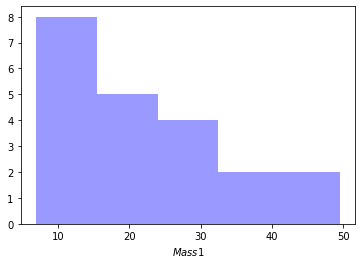

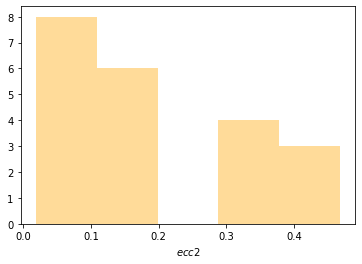

In [16]:
# Mass of planet b (Mass1)
m1 = [i[1] for i in RESULTS_opt]
sns.distplot(m1, kde=False, bins=5, color='blue')
plt.xlabel(r'$Mass1$')

plt.figure()
# Eccentricity of planet c (ecc2)
e2 = [i[10] for i in RESULTS_opt]
sns.distplot(e2, kde=False, bins=5, color='orange')
plt.xlabel(r'$ecc2$')

Best solution from the optimizers

In [17]:
# We sort the results according to the chi square
sort_res = sorted(RESULTS_opt, key=lambda j: j[0])

# Let's take 'the best'
bestChi2 = sort_res[0][0]
best_planetary_params = sort_res[0][1:]

print("Best result of the optimizers:\n")
print("chi_2: ", bestChi2)
print("\n-->Planetary parameters: ", best_planetary_params)

# Splitting by number of planets in the system:
planets = [best_planetary_params[:7], best_planetary_params[7:]]
pla1 = planets[0]
pla2 = planets[1]

print("\n-->Best planetary parameters for planet1: ")
print("  ", pla1)
print("\n-->Best planetary parameters for planet2: ",)
print("  ", pla2)

Best result of the optimizers:

chi_2:  8180.066023355375

-->Planetary parameters:  [6.8875121891816296, 33.62064250736029, 0.059522947537187454, 88.49421233987647, 239.27562263449101, 203.93491833639655, 177.26910967242276, 15.520897602732273, 73.50457593805274, 0.08192960753842185, 89.60241423569238, 332.8905796208737, 210.5826985796648, 180.0]

-->Best planetary parameters for planet1: 
   [6.8875121891816296, 33.62064250736029, 0.059522947537187454, 88.49421233987647, 239.27562263449101, 203.93491833639655, 177.26910967242276]

-->Best planetary parameters for planet2: 
   [15.520897602732273, 73.50457593805274, 0.08192960753842185, 89.60241423569238, 332.8905796208737, 210.5826985796648, 180.0]


##### Remember that the 7 Planetary parameters follow always the order: 

##### mass, period, eccentricity, inclination, argument, mean anomaly and ascending node

Let's plot the best 3 solutions from the optimizer and compare them with the observed TTVs. To do that, we import a useful function plot_TTVs.

Pass the Planetary Object and a list of lists with the solutions you want to plot

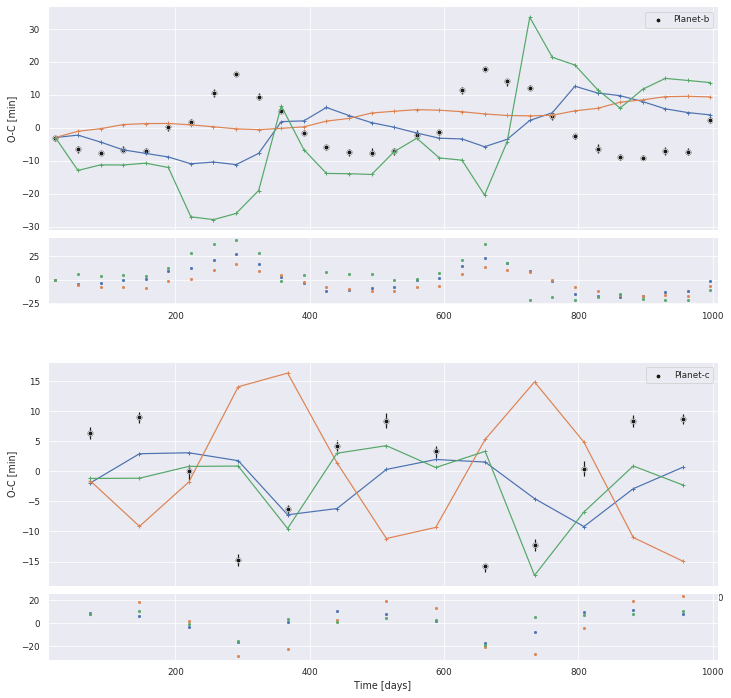

In [18]:
from plots import plot_TTVs

# Extract the best n solutions
n_sols = 3
best_n_solutions = [s[1:] for s in sort_res[:n_sols]]
#print(best_n_solutions)

# Plot the observed TTVs and the 3 solutions
plot_TTVs(PS, best_n_solutions)

# Change figure size
plt.gcf().set_size_inches(12,12)
#plt.savefig("TTVs_optimizer.png")

Ok, that does not looks like an ideal TTVs fit. Results from the optimizers provide an overall outlook of the solutions in the parameter space. To get better solutions, just increase the number of solution in Optimizers.run_optimizers. These solutions can be used to initialize walkers in the MCMC.

### Runing the MCMC

We employ Parallel-Tempering sampling algorithm to explore the parameter space at different walker temperatures. This method allows the walkers do not get stuck in local high probability regions due to the exchange between high and low temperature walkers. The posteriors are drawn from the walkers at temperature 0.

Let's define the main parameters to run the MCMC

In [19]:
Ntemps = 10   # Number of temperatures
Nwalkers = 200 # Number of walkers per temperature
Tmax = 1e3    # Maximum temperature. If None, then Parallel-Tempering chose an appropiate maximum temperature

itmax = 1000  # Maximum number of steps
conver_steps = 10  # Numberof steps to save the chains

Initial walkers should be provided in an array of shape (ntemps, nwalkers, ndim), where ndim is the number of dimensions (mass1, period1...).

We provides 3 forms of easily initialize walkers.

In [20]:
from utils import initial_walkers

# Let's initialize walkers from the results of the optimizers
RESULTS_opt = np.genfromtxt('SystemX.opt')


""" 1) Uniform distribution
 For all the planetary parameters, initialize walkers from an uniform distribution
 along the stablished boundaries for each planet"""
# Using this option is unnecesary to run optimizers previously
walkers_uniform = initial_walkers(PS, distribution="Uniform", 
                                 ntemps=Ntemps, nwalkers=Nwalkers)

"""   2) Gaussian distribution
 Provide directly the results of the optimizers (throuhgt opt_data argument) and 
 construct a gaussian with the mean and std of the solutions along each dimension."""
# In opt_data, pass RESULTS_opt (from optimizers) or results_opt (from file)
# treshold selects a fraction of the best solutions and discard the rest.
# For example, .8 takes the 80% of the solutions with the best Chi**2
walkers_gaussian = initial_walkers(PS, distribution="Gaussian", 
                                   ntemps=Ntemps, nwalkers=Nwalkers, 
                                   opt_data=RESULTS_opt, threshold=0.6)    

"""   3) Picked distribution
  Provide directly the results of the optimizers (throuhgt opt_data argument) and 
  construct a discrete distribution by randomly selecting exact values of the optimizer solutions"""
# In opt_data, pass RESULTS_opt (from optimizers) or results_opt (from file)
# treshold selects a fraction of the best solutions and discard the rest.
# For example, .8 takes the 80% of the solutions with the best Chi**2
walkers_picked = initial_walkers(PS, distribution="Picked", 
                                 ntemps=Ntemps, nwalkers=Nwalkers, 
                                 opt_data=RESULTS_opt, threshold=0.6)

#AQUI HAY UN BUG CUANDO CHI2 ES 1E+50 PORQUE NO SE AGREGAN LOS VALORES CONSTANTES


--> Selected distribution: Uniform

--> Selected distribution: Gaussian

--> Selected distribution: Picked


Note that if there are constant values in the planet's boundaries, then that parameter will be skipped and values will not appear in the initial walkers

Text(0.5, 0, 'mass1')

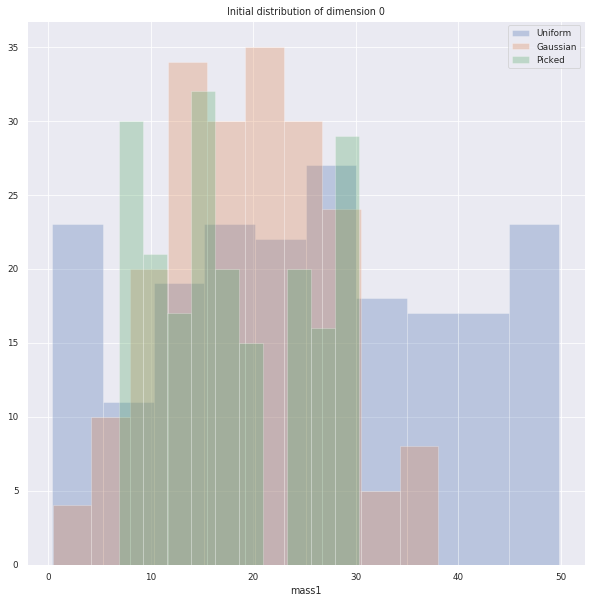

In [21]:
# Comparing the initial distributions of the walkers for the dimension -dim- of temperature 0
# For dim: 0: mass1, 1: period1, ...,7: mass2, 8: period2..
dim = 0
plt.figure(figsize=(10,10))
plt.title(f"Initial distribution of dimension {dim}")
plt.hist(walkers_uniform[0,:,dim], alpha = 0.3, label='Uniform')
plt.hist(walkers_gaussian[0,:,dim], alpha = 0.3, label='Gaussian')
plt.hist(walkers_picked[0,:,dim], alpha = 0.3, label='Picked')
plt.legend()

plt.xlabel(PS.params_names.split()[dim])

Let's select the gaussian option to run the MCMC

In [22]:
RESULTS_mcmc = MCMC.run_mcmc(
            PS,                  # Planetary System object
            nwalkers=Nwalkers,     # Number of walkers
            ntemps=Ntemps,         # Number of temperatures
            Tmax=Tmax,             # Maximum temperature
            betas=None,            # Betas is an array of inverse temperatures
            pop0=walkers_gaussian, # Initial population of walkers            
            Itmax=itmax,           # Maximum nomber of iterations (steps)
            conver_steps=conver_steps,       # Save data each this number of steps
            cores=7,               # Number of cores to run in parallel
            suffix='')             # Suffix to add at the final hdf5 file


 =========== PARALLEL-TEMPERING MCMC ===========

--> Starting date:  2019-12-06 14:40
--> Results will be saved at:  SystemX.hdf5 

--------- Iteration:  10
 Mean tau: 0.753
 Accepted swap fraction in Temp 0:  0.271
 Mean acceptance fraction Temp 0:  0.308
 Mean likelihood:  -1891887096.573
 Better Chi2:  (0, 182) -475714.464
 Current mean Chi2 dispersion:  0.0
 Saving...
 Elapsed time:  0.1477 min
--------- Iteration:  20
 Mean tau: 1.499
 Accepted swap fraction in Temp 0:  0.17
 Mean acceptance fraction Temp 0:  0.273
 Mean likelihood:  -184634203.316
 Better Chi2:  (0, 77) -75134.244
 Current mean Chi2 dispersion:  853626446.629
 Saving...
 Elapsed time:  0.284 min
--------- Iteration:  30
 Mean tau: 2.241
 Accepted swap fraction in Temp 0:  0.132
 Mean acceptance fraction Temp 0:  0.258
 Mean likelihood:  -11818812.49
 Better Chi2:  (0, 77) -75134.244
 Current mean Chi2 dispersion:  86407695.413
 Saving...
 Elapsed time:  0.431 min
--------- Iteration:  40
 Mean tau: 2.977
 Accep

--------- Iteration:  310
 Mean tau: 19.987
 Accepted swap fraction in Temp 0:  0.019
 Mean acceptance fraction Temp 0:  0.172
 Mean likelihood:  -4426.517
 Better Chi2:  (0, 117) -1042.481
 Current mean Chi2 dispersion:  4733.687
 Saving...
 Elapsed time:  4.7377 min
--------- Iteration:  320
 Mean tau: 20.468
 Accepted swap fraction in Temp 0:  0.018
 Mean acceptance fraction Temp 0:  0.172
 Mean likelihood:  -4067.915
 Better Chi2:  (0, 117) -1042.481
 Current mean Chi2 dispersion:  4783.472
 Saving...
 Elapsed time:  4.9309 min
--------- Iteration:  330
 Mean tau: 20.933
 Accepted swap fraction in Temp 0:  0.018
 Mean acceptance fraction Temp 0:  0.171
 Mean likelihood:  -3803.603
 Better Chi2:  (0, 117) -1042.481
 Current mean Chi2 dispersion:  3977.925
 Saving...
 Elapsed time:  5.0795 min
--------- Iteration:  340
 Mean tau: 21.383
 Accepted swap fraction in Temp 0:  0.017
 Mean acceptance fraction Temp 0:  0.17
 Mean likelihood:  -3572.781
 Better Chi2:  (0, 117) -1042.481
 Cur

--------- Iteration:  620
 Mean tau: 23.382
 Accepted swap fraction in Temp 0:  0.011
 Mean acceptance fraction Temp 0:  0.176
 Mean likelihood:  -1042.306
 Better Chi2:  (0, 9) -436.442
 Current mean Chi2 dispersion:  927.188
 Saving...
 Elapsed time:  9.8234 min
--------- Iteration:  630
 Mean tau: 23.028
 Accepted swap fraction in Temp 0:  0.01
 Mean acceptance fraction Temp 0:  0.177
 Mean likelihood:  -1008.515
 Better Chi2:  (0, 36) -412.683
 Current mean Chi2 dispersion:  860.726
 Saving...
 Elapsed time:  10.0296 min
--------- Iteration:  640
 Mean tau: 22.655
 Accepted swap fraction in Temp 0:  0.01
 Mean acceptance fraction Temp 0:  0.179
 Mean likelihood:  -967.408
 Better Chi2:  (0, 36) -396.731
 Current mean Chi2 dispersion:  869.838
 Saving...
 Elapsed time:  10.1881 min
--------- Iteration:  650
 Mean tau: 22.263
 Accepted swap fraction in Temp 0:  0.01
 Mean acceptance fraction Temp 0:  0.181
 Mean likelihood:  -916.313
 Better Chi2:  (0, 9) -381.092
 Current mean Chi2 

--------- Iteration:  930
 Mean tau: 6.716
 Accepted swap fraction in Temp 0:  0.008
 Mean acceptance fraction Temp 0:  0.215
 Mean likelihood:  -211.58
 Better Chi2:  (0, 75) -34.796
 Current mean Chi2 dispersion:  518.62
 Saving...
 Elapsed time:  15.0024 min
--------- Iteration:  940
 Mean tau: 6.121
 Accepted swap fraction in Temp 0:  0.008
 Mean acceptance fraction Temp 0:  0.215
 Mean likelihood:  -208.626
 Better Chi2:  (0, 75) -32.73
 Current mean Chi2 dispersion:  520.482
 Saving...
 Elapsed time:  15.1841 min
--------- Iteration:  950
 Mean tau: 5.554
 Accepted swap fraction in Temp 0:  0.008
 Mean acceptance fraction Temp 0:  0.215
 Mean likelihood:  -206.098
 Better Chi2:  (0, 150) -27.716
 Current mean Chi2 dispersion:  500.596
 Saving...
 Elapsed time:  15.3317 min
--------- Iteration:  960
 Mean tau: 5.03
 Accepted swap fraction in Temp 0:  0.008
 Mean acceptance fraction Temp 0:  0.216
 Mean likelihood:  -195.241
 Better Chi2:  (0, 150) -27.716
 Current mean Chi2 disper

In [23]:
import h5py
f = h5py.File('SystemX.hdf5', 'r')
print(f['COL_NAMES'].value[:])
f.close()

mass1  period1  ecc1  inclination1  argument1  mean_anomaly1  ascending_node1  mass2  period2  ecc2  inclination2  argument2  mean_anomaly2


Results of the MCMC are saved in a .hdf5 file. Also at the end of the iterations, best solutions are extracted (corresponding to the solutions of 'better posterior') and saved in a .best file 

##### MCMC Summary

In [24]:
from utils import mcmc_summary

mcmc_summary("SystemX.hdf5")

-->Planetary System:  SystemX
   Stellar mass:  0.91
   Stellar radius:  1.18
   Number of planets:  2
--------------------------
-->MCMC parameters
   Ntemps:  10
   Nwalkers per temperature:  200
   Thining:  10
--------------------------
      RESULTS             
-->Best solution in MCMC
   Best chi2 solution:  -24.60425
   8.2208   33.6187   0.1218   89.3445   329.6425   107.0714   179.7638
   15.3717   73.5069   0.0884   89.6339   64.1683   128.1634   180.0
--------------------------
-->MCMC medians and 1-sigma errors
             mass1      12.08 ^{+6.7}_{-4.07}
           period1      33.6179 ^{+0.0011}_{-0.0022} 
              ecc1      0.11 ^{+0.021}_{-0.012}
      inclination1      89.3 ^{+0.27}_{-0.29}
         argument1      310.44 ^{+14.62}_{-44.32}
     mean_anomaly1      113.34 ^{+60.29}_{-15.66}
   ascending_node1      176.52 ^{+1.36}_{-1.49}
             mass2      22.99 ^{+6.31}_{-7.87}
           period2      73.51 ^{+0.01}_{-0.0}
              ecc2      0.09 ^{+0.0

# Visualization

There is a collection of prefabricated methods to easily visualize the results from the MCMC. 

Let's visualize the histograms of the posteriors at temperature 0

(200, 100, 13)


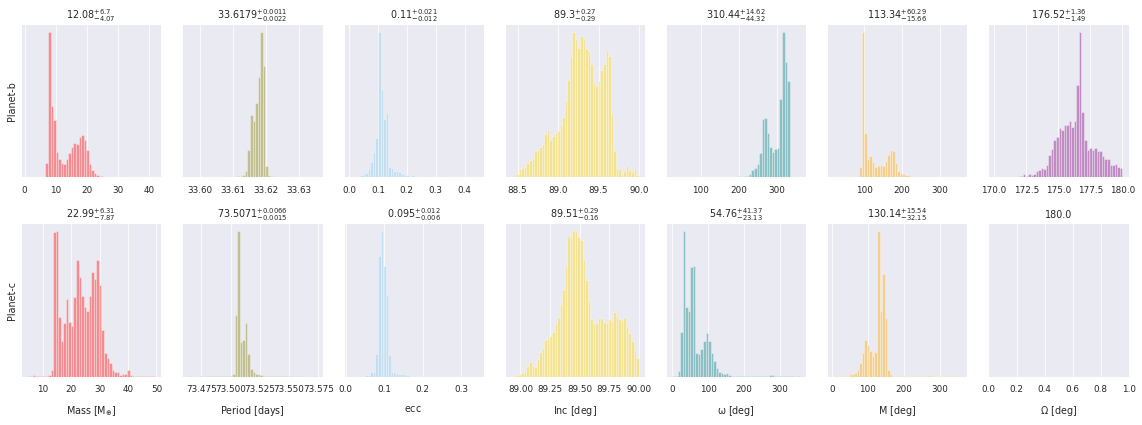

In [25]:
from plots import plot_hist

print(RESULTS_mcmc.chain[0].shape)

# burning remove a percentage of the initial chains
plot_hist(PS, chains=RESULTS_mcmc.chain[0], burning=.2)

And the chains at temperature 0

Text(0.5, 0, 'Iterations / 10')

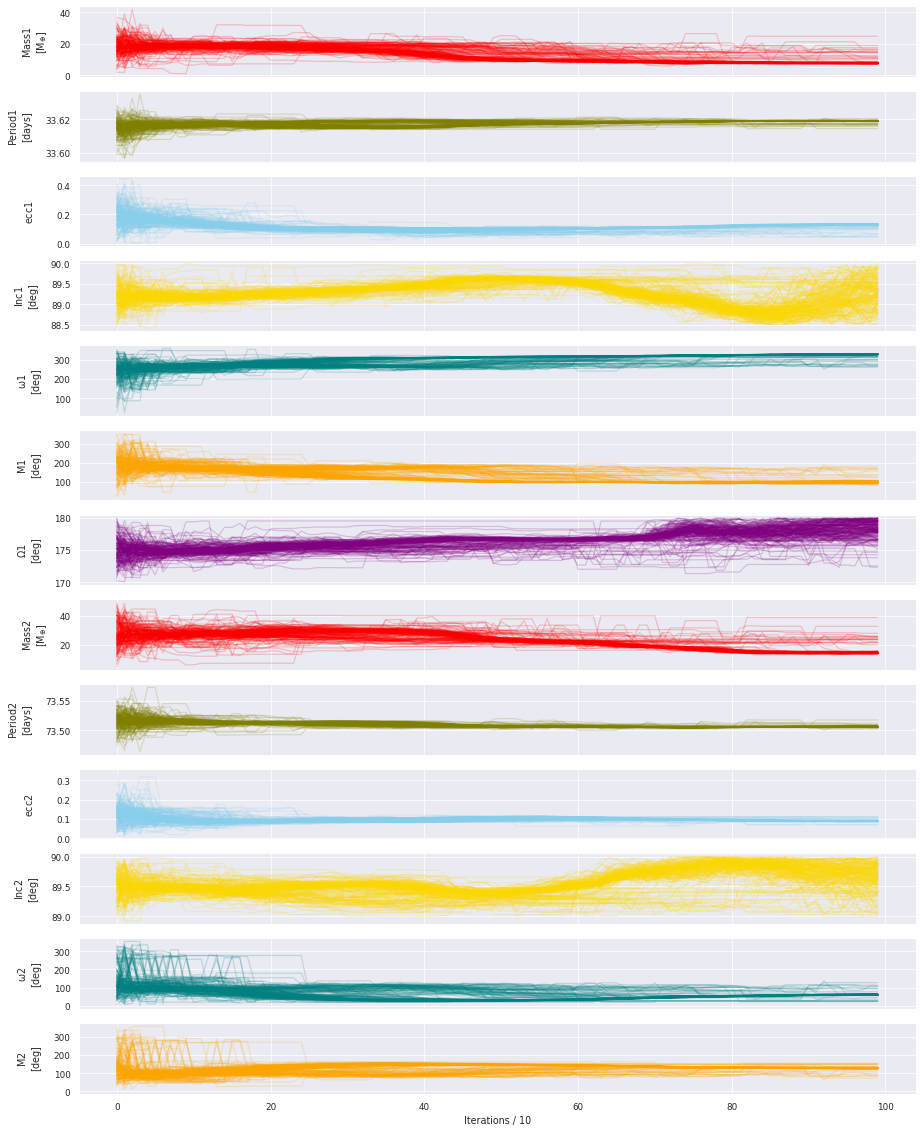

In [26]:
from plots import plot_chains

plot_chains(PS, chains=RESULTS_mcmc.chain[0])
plt.xlabel(f'Iterations / {conver_steps}')

And now, a corner plot to visualize possible correlation between parameters

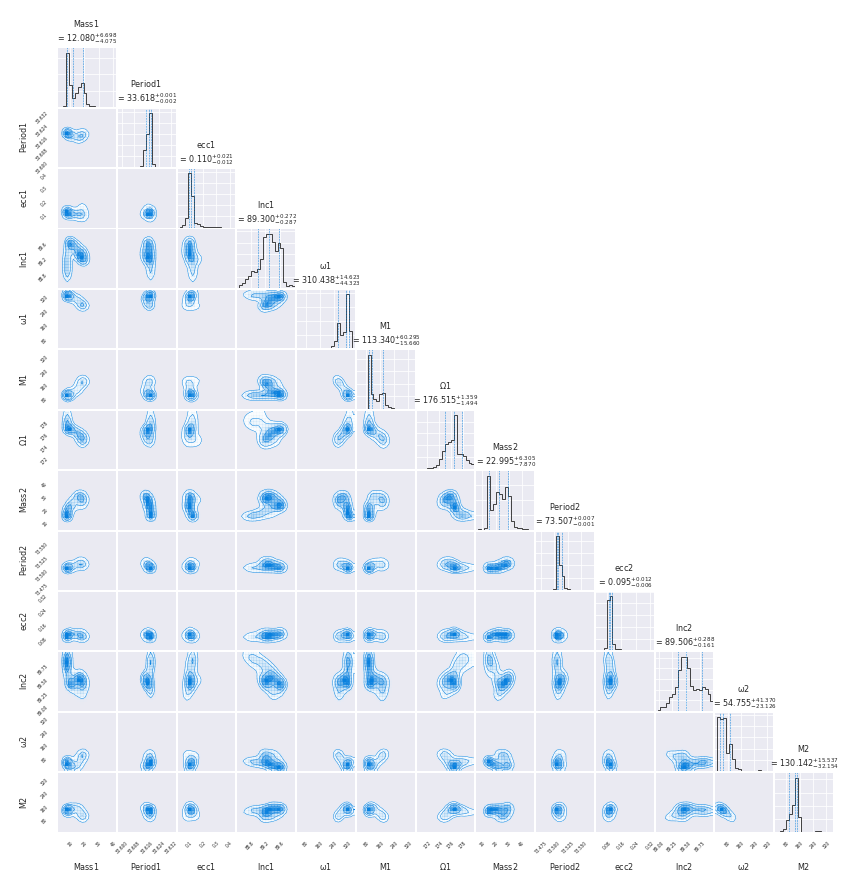

In [27]:
from plots import plot_corner

import matplotlib.pyplot as plt

plot_corner(PS, chains=RESULTS_mcmc.chain[0], burning=0.2)
plt.gcf().set_size_inches(12,12)
plt.show()

______________________

## After simulations

Along the simulations many files have been saved automathically. Considering a Planetary System of name PSystem, the output files are:

    * PSystem.pkl - Contains the Planetary System object saved through pickle.
    * PSystem.opt - Contains the results of the optimizers
    * PSystem.hdf5 - Contains the main features of the MCMC
    * PSystem.best - Contains the best solutions of each saved iteration in the MCMC sorted by -chi2

Now let's see how to analyze the results saved in those files, in another time or computer.

In [4]:
# Let's load the Planetary System
import pickle

with open('SystemX.pkl', 'rb') as input:
    PS_pkl = pickle.load(input)

print(PS_pkl)


 =========== Planetary System Summary =========== 
System: SystemX
Mstar: 0.91 Msun |  Rstar: 1.18 Rsun
Number of planets: 2
------
Planet-b
     mass      period      ecc      inclination      argument      mean_anomaly      ascending_node
  [0.1, 50]  [33.5, 33.7]  [0.0001, 0.5]  [80, 90.0]  [0.0, 360.0]  [0.0, 360.0]  [170, 180.0]
  TTVs: True
------
Planet-c
     mass      period      ecc      inclination      argument      mean_anomaly      ascending_node
  [0.1, 50]  [73.4, 73.6]  [0.0001, 0.5]  [80, 90.0]  [0.1, 360.0]  [0.0, 360.0]  [180.0, 180.0]
  TTVs: True

Total time of TTVs data: 996.625070414 [days]
First planet (ID) in transit: Planet-b
Observed time of the first transit: 21.5523131438 [days]
Interval time to make the simulations: 977.22798858458


### Result from the optimizers

[[6.88751, 33.62064, 0.05952, 88.49421, 239.27562, 203.93492, 177.26911, 15.5209, 73.50458, 0.08193, 89.60241, 332.89058, 210.5827, 180.0], [26.68324, 33.62322, 0.03787, 88.52483, 92.8555, 351.24937, 179.98285, 3.45957, 73.5001, 0.01851, 89.64261, 45.05688, 147.41724, 180.0], [10.49571, 33.61167, 0.06003, 89.99695, 301.71578, 122.5299, 170.00041, 43.97028, 73.51059, 0.17386, 89.98993, 2.99272, 164.1277, 180.0]]


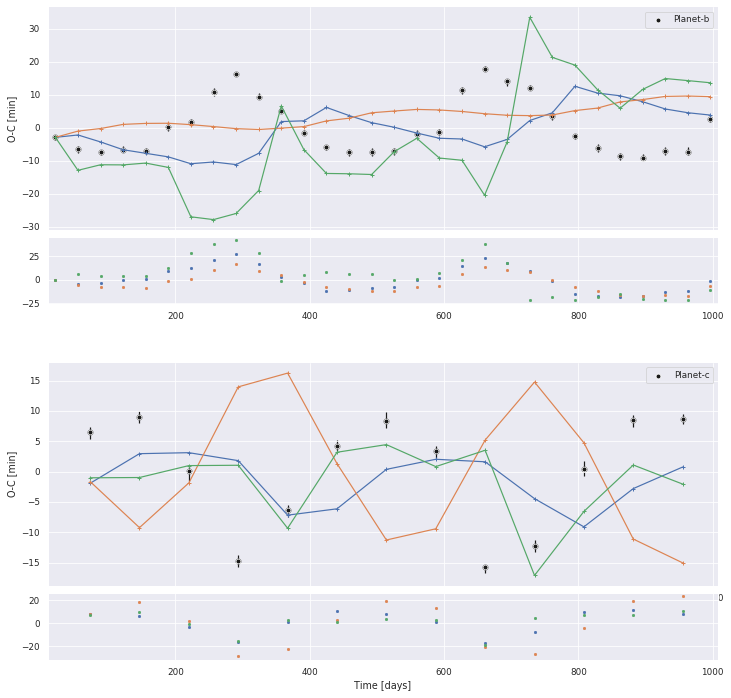

In [29]:
from plots import plot_TTVs
import matplotlib.pyplot as plt
import numpy as np

# From the file
results_file = np.genfromtxt("SystemX.opt")
results_opt = results_file.tolist() #Convert data array to list

sort_res = sorted(results_opt, key=lambda j: j[0])

# Extract the best n solutions
n_sols = 3
best_n_solutions = [s[1:] for s in sort_res[:n_sols]]
print(best_n_solutions)

# Plot the observed TTVs and the 3 solutions
plot_TTVs(PS_pkl, best_n_solutions)

plt.gcf().set_size_inches(12,12)  # Change figure size
#plt.savefig("TTVs_optimizer.png")

### Results from the saved hdf5

Let's see how was de MCMC. plot_monitor will shou you a couple of plots to assess the performance of the MCMC

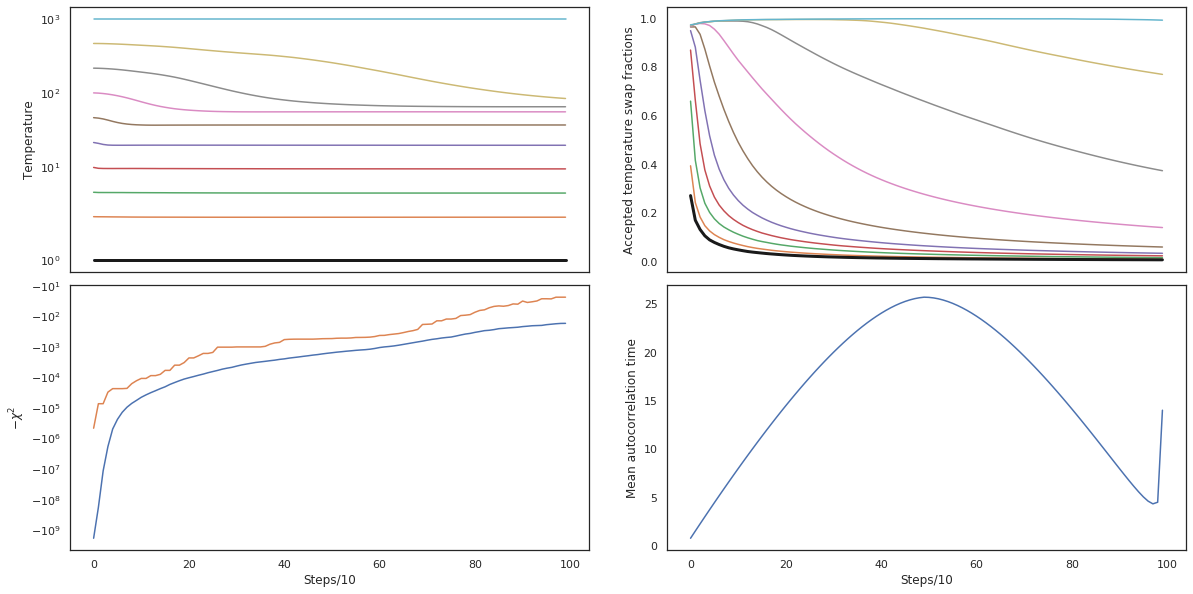

In [31]:
from plots import plot_monitor

plot_monitor("SystemX.hdf5")


Let's make a Geweke test and plot to asses for ergodicity. It takes the first 10% of the chains and divide the last 50% in 20 chunks to perform a z-test comparing the medians. If values of the test are between -2 and 2, then it is evidence of convergence.

--> Performing Geweke test
[2.0600946572440066, 2.28596821128725, 2.4170273530572093, 2.4960852186513045, 2.592088135506419, 2.7599702510000634, 2.7591087028604155, 2.671118973996233, 2.5862531118822996, 2.7243907039768325, 3.0328979487709735, 2.881674899837841, 2.8045117543833697, 2.9220547527814458, 2.8421308592487082, 2.9674096388984865, 2.904212585989727, 2.873154525049661, 2.92672584723546, 3.041174096014868]


Text(0.5, 0, 'Slice number')

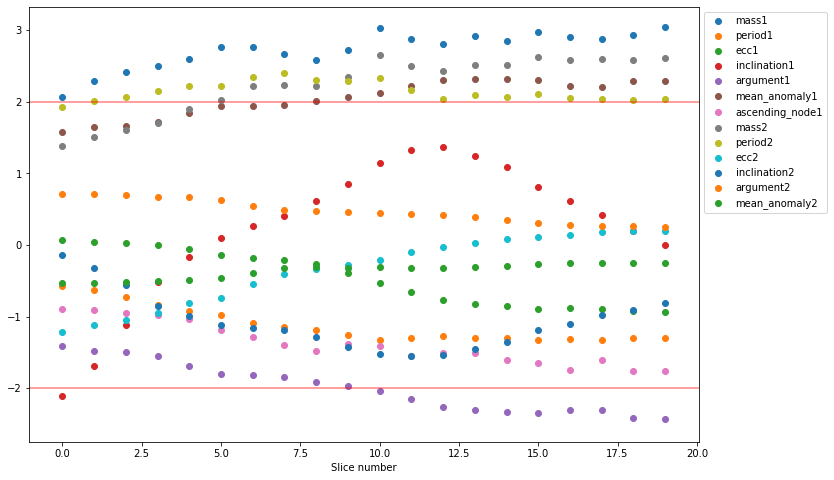

In [5]:
from utils import geweke

Z_test = geweke(PS_pkl, hdf5_file='SystemX.hdf5',burning=0.2)
print(Z_test[0])

# Geweke plot:
plt.figure(figsize=(12,8))
for i, zt in enumerate(Z_test):
    plt.scatter(range(len(zt)), zt, label=PS_pkl.params_names.split()[i])

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.axhline(-2, alpha=0.5, color='red')
plt.axhline(2, alpha=0.5, color='red')
plt.xlabel("Slice number")


In [6]:
#Ntemps,Nwalkers, Nsteps, Ndim)

def z_score(theta_a, theta_b):
    #theta_a = theta_a.flatten()
    #theta_b = theta_b.flatten()
    
    z = (np.mean(theta_a) - np.mean(theta_b)) / np.sqrt(np.var(theta_a) + np.var(theta_b))
    
    #print(np.mean(theta_a), np.mean(theta_b))
    return z
    


burning_idx = int((index+1)*0.)
print(burning_idx)
print("inicial ",RESULTS_mcmc.chain[0,:,:,:].shape)

burned_chains = RESULTS_mcmc.chain[0,:,burning_idx:index+1,:] #index?
print("burned_chains", burned_chains.shape)

current_length = burned_chains.shape[1]
print(current_length)

subset_first_10 = burned_chains[:,:int(current_length/10),:]
print("10 f", subset_first_10.shape)

subset_second_50 = burned_chains[:,int(current_length/2):,:]
print("50 f", subset_second_50.shape)

chunks_idx = [int(i) for i in np.linspace(0,subset_second_50.shape[1],21)][1:-1]
print("chunks: ", chunks_idx)

subsets_20 = np.split(subset_second_50, indices_or_sections=chunks_idx, axis=1)
#print("subsets_20 ", np.shape(subsets_20))
print('---')


#for dimension in range(4):

plt.figure(figsize=(12,8))

Z = []
for dimension in range(13):
    ztas = []
    #print("mean first 10: ", np.mean(subset_first_10[:,:,dimension]))
    for sub20 in subsets_20:
        #print(sub20.shape)
        z = z_score(subset_first_10[:,:,dimension], sub20[:,:,dimension])
        ztas.append(z)
        Z.append(z)
        #print(dimension, np.mean(sub20[:,:,dimension]), "z score:", z)
    #print(len(ztas))
    plt.scatter(range(len(ztas)), ztas, alpha=0.2, color='k')
        
fraction_converged = sum(i>-1. and i<1. for i in Z)/len(Z)
print("Geweke: ", fraction_converged)
print(ztas)
plt.axhline(-1)
plt.axhline(1)
plt.ylim(-2.5, 2.5)
plt.show()
print('done')

0


NameError: name 'RESULTS_mcmc' is not defined

In [7]:
#print(np.shape(subsets_20))
#for i in subsets_20:
#    print(np.shape(i))
print(len(ztas))

sum(i>-2. and i<2. for i in ztas)/len(ztas)

NameError: name 'ztas' is not defined

In [5]:
from plots import plot_hist

plot_hist(PS_pkl, hdf5_file='SystemX.hdf5', burning=2.0)

AssertionError: burning must be between 0 and 1. 2.0 given

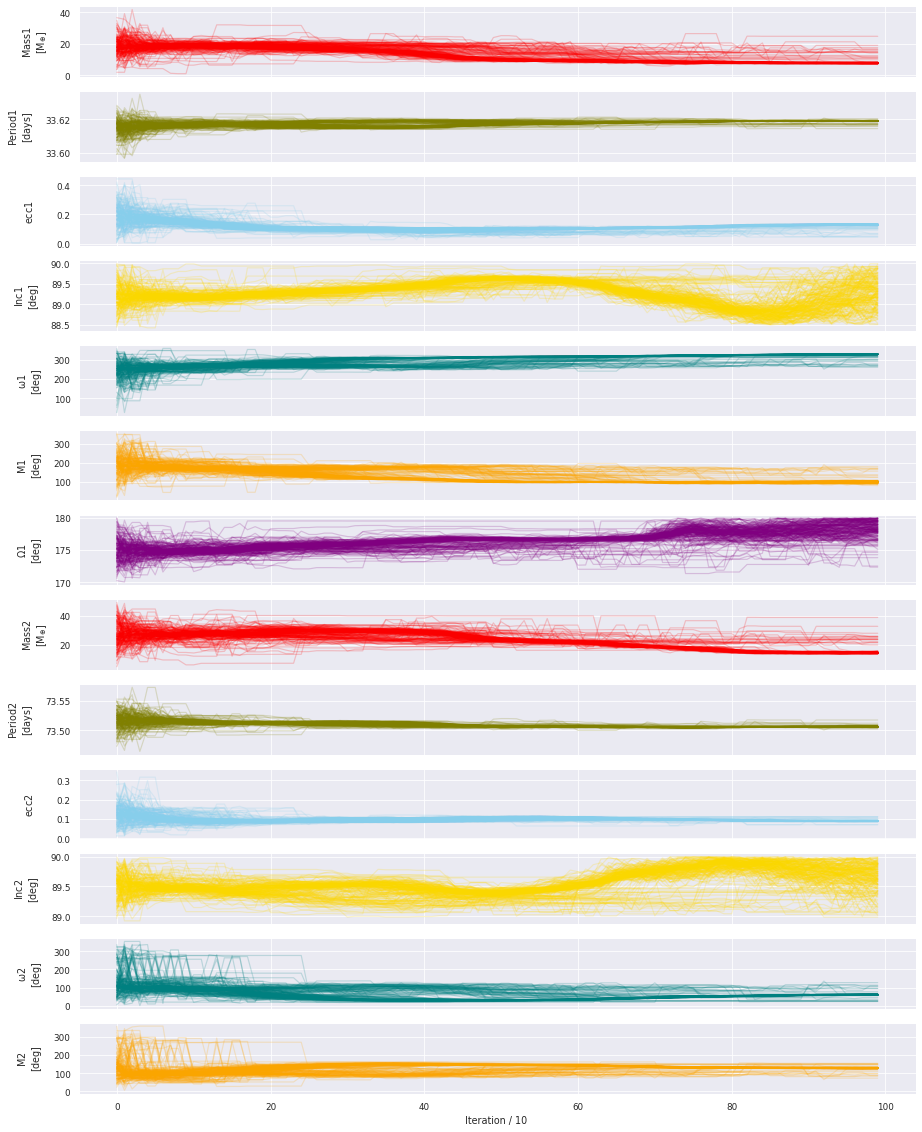

In [7]:
from plots import plot_chains

# By default, temperature 0 will be used
plot_chains(PS_pkl, chains=None, hdf5_file='SystemX.hdf5')

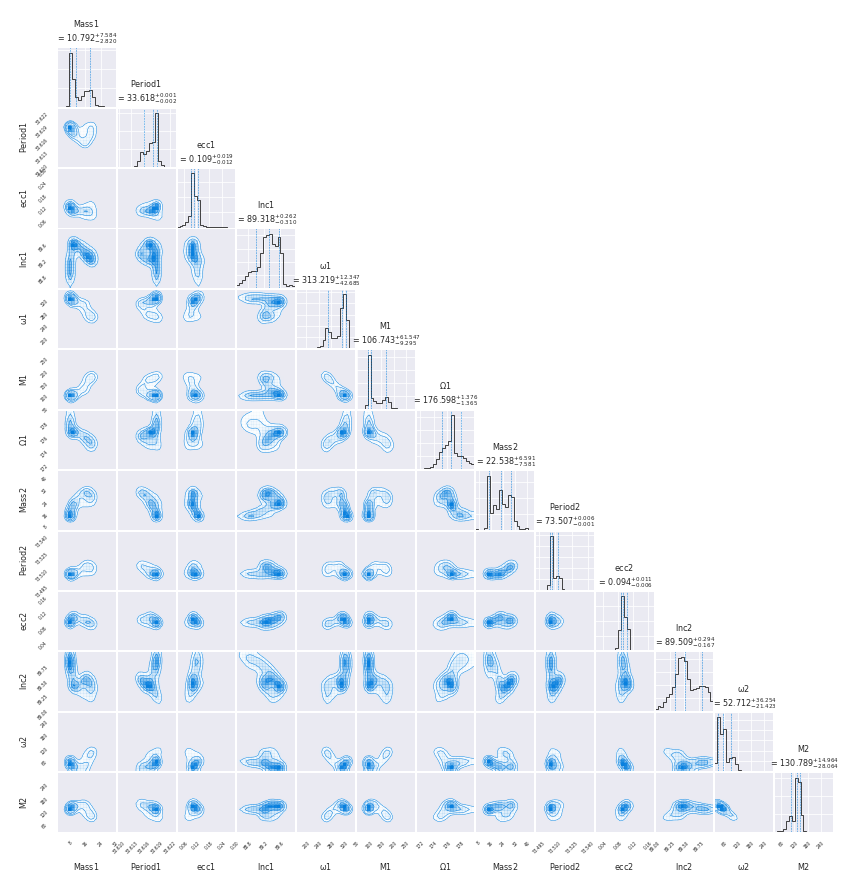

In [8]:
from plots import plot_corner
import matplotlib.pyplot as plt

plot_corner(PS_pkl, chains=None, hdf5_file='SystemX.hdf5', burning=0.1)
plt.gcf().set_size_inches(12,12)
plt.show()

In [9]:
MCMC.extract_best_solutions("SystemX.hdf5")

--> Best solutions from the MCMC will be written at:  SystemX.best


[-24.6223, 8.18346, 33.61874, 0.12215, 89.3539, 329.55776, 106.99282, 179.65315, 15.32339, 73.50683, 0.08848, 89.63217, 63.97675, 128.26128, 180.0]
[[8.22085, 33.61874, 0.12184, 89.34452, 329.64252, 107.07136, 179.7638, 15.37168, 73.50685, 0.08845, 89.63388, 64.16827, 128.16338, 180.0]]


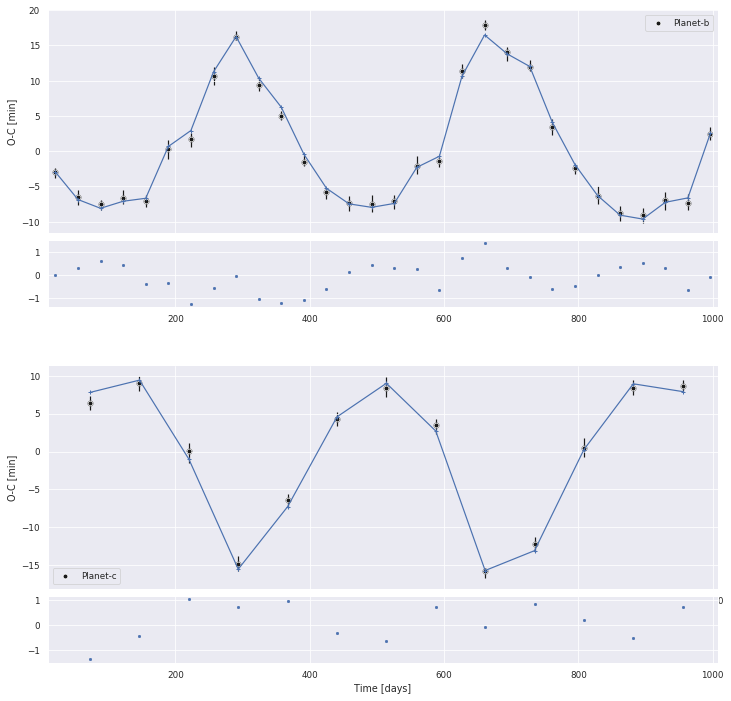

In [10]:
from plots import plot_TTVs
import numpy as np

# Best solutions found in the MCMC (from the file)
best_file = np.genfromtxt("SystemX.best")
results_mcmc = best_file.tolist() #Convert data array to list

# Reverse the list because we sorte by -chi**2
sort_res = sorted(results_mcmc, key=lambda j: j[0], reverse=True)

# Extract the best n solutions
n_sols = 1
print(sort_res[n_sols])
best_n_solutions = [s[1:] for s in sort_res[:n_sols]]

print(best_n_solutions)

# Plot the observed TTVs and the 3 solutions
plot_TTVs(PS_pkl, best_n_solutions)

plt.gcf().set_size_inches(12,12)  # Change figure size

## Aditional notes

Sometimes there will raise an "Invalid proposal"

Cómo graficar plot_TTVs sin que el objecto planetary system tenga toda la información de los planetas (como boundaries)

En el codigo hacer que te imprima un resumen de los resultados.. o los guarde. Se le puede pedir los percentiles y que te de un resumen de las medianas y errores de los posteriores
Se pueden hacer varios tutoriales: optimizadores, mcmc, plots, correr soluciones aisladas, recuperar tiempos de transitos, etc